In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('cleaned_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              497 non-null    int64  
 1   uni_adm_yr              497 non-null    int64  
 2   gender                  497 non-null    object 
 3   age                     497 non-null    int64  
 4   hsc_pass_yr             497 non-null    int64  
 5   curr_semester           497 non-null    int64  
 6   scholarship             497 non-null    object 
 7   uni_transport_use       497 non-null    object 
 8   study_hrs_day           497 non-null    int64  
 9   study_seat_day          497 non-null    int64  
 10  pref_learn_mode         497 non-null    object 
 11  smart_phone_use         497 non-null    object 
 12  personal_comp           497 non-null    object 
 13  socialmed_hrs_day       497 non-null    int64  
 14  eng_proficiency         497 non-null    ob

In [5]:
df = df.drop(df.columns[[0, 27]], axis = 1)

In [6]:
df['gap_hsc_adm'] = df['uni_adm_yr'] - df['hsc_pass_yr']

In [7]:
np.sort(df.gap_hsc_adm.unique())

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [8]:
df.gap_hsc_adm.value_counts()

gap_hsc_adm
1    262
2    140
0     73
3     15
4      3
5      2
7      1
6      1
Name: count, dtype: int64

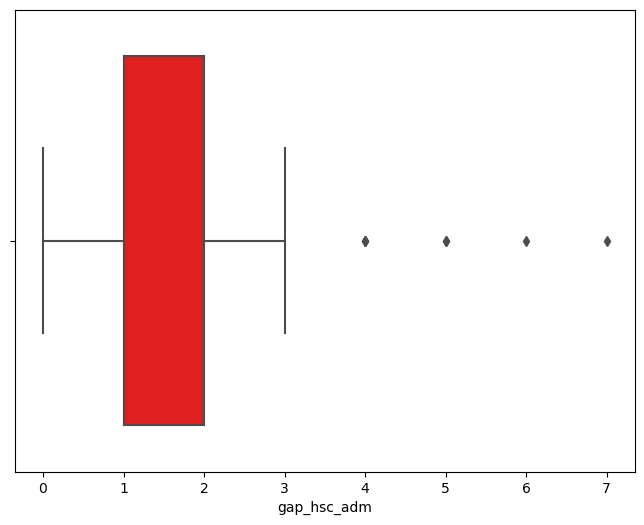

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["gap_hsc_adm"], color="red")

plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uni_adm_yr              497 non-null    int64  
 1   gender                  497 non-null    object 
 2   age                     497 non-null    int64  
 3   hsc_pass_yr             497 non-null    int64  
 4   curr_semester           497 non-null    int64  
 5   scholarship             497 non-null    object 
 6   uni_transport_use       497 non-null    object 
 7   study_hrs_day           497 non-null    int64  
 8   study_seat_day          497 non-null    int64  
 9   pref_learn_mode         497 non-null    object 
 10  smart_phone_use         497 non-null    object 
 11  personal_comp           497 non-null    object 
 12  socialmed_hrs_day       497 non-null    int64  
 13  eng_proficiency         497 non-null    object 
 14  avg_class_attend_perc   497 non-null    in

In [11]:
df.gender = df.gender.map({'Male': 1, 'Female': 0})
df.scholarship = df.scholarship.map({'Yes': 1, 'No': 0})
df.uni_transport_use = df.uni_transport_use.map({'Yes': 1, 'No': 0})
df.pref_learn_mode = df.pref_learn_mode.map({'Offline': 1, 'Online': 0})
df.smart_phone_use = df.smart_phone_use.map({'Yes': 1, 'No': 0})
df.personal_comp = df.personal_comp.map({'Yes': 1, 'No': 0})
df.probation_record = df.probation_record.map({'Yes': 1, 'No': 0})
df.suspension_record = df.suspension_record.map({'Yes': 1, 'No': 0})
df.teacher_consult = df.teacher_consult.map({'Yes': 1, 'No': 0})
df.co_curricular_activity = df.co_curricular_activity.map({'Yes': 1, 'No': 0})
df.co_living = df.co_living.map({'Bachelor': 1, 'Family': 0})
df.health_issues = df.health_issues.map({'Yes': 1, 'No': 0})
df.physical_disability = df.physical_disability.map({'Yes': 1, 'No': 0})

In [12]:
df.head(15)

,uni_adm_yr,gender,age,hsc_pass_yr,curr_semester,scholarship,uni_transport_use,study_hrs_day,study_seat_day,pref_learn_mode,...,co_living,health_issues,previous_sGPA,physical_disability,credits_completed,fam_income_month,curr_cGPA_binary,curr_cGPA_quaternary,curr_cGPA_ternary,gap_hsc_adm
0,2021,0,22,2019,4,1,0,2,2,1,...,1,0,3.80,0,35,32500.0,1,3,2,2
1,2021,1,22,2019,4,0,0,3,2,1,...,1,1,3.40,0,35,20000.0,1,3,2,2
2,2021,1,20,2020,4,1,1,2,1,1,...,0,0,3.93,0,35,30000.0,1,3,2,1
3,2021,1,21,2020,4,1,0,1,2,0,...,0,0,3.10,0,35,40000.0,1,3,2,1
4,2021,0,21,2019,4,1,0,3,2,1,...,1,0,3.81,0,34,30000.0,1,3,2,2
5,2021,1,21,2020,4,1,1,1,1,0,...,1,1,3.89,0,35,35000.0,1,3,2,1
6,2021,0,20,2020,4,0,0,3,2,1,...,0,0,3.79,0,39,50000.0,1,3,2,1
7,2021,1,21,2020,4,1,1,2,1,0,...,1,1,3.28,0,35,8000.0,1,2,2,1
8,2022,1,20,2020,2,1,0,3,1,1,...,0,0,3.90,0,12,60000.0,1,3,2,2
9,2020,1,21,2019,2,1,0,3,2,1,...,1,0,3.84,0,80,23000.0,1,3,2,1


In [13]:
df.eng_proficiency.unique()

array(['Basic', 'Advance', 'Intermediate'], dtype=object)

In [14]:
cat_eng_prof = ['Basic', 'Intermediate', 'Advance']

OrEn_eng_proficiency = OrdinalEncoder(categories = [cat_eng_prof], dtype = 'int')

df.eng_proficiency = OrEn_eng_proficiency.fit_transform(df[['eng_proficiency']])

In [15]:
df.eng_proficiency.unique()

array([0, 2, 1])

In [16]:
df.relationship_status.unique()

array(['Single', 'In a relationship', 'Married', 'Engaged'], dtype=object)

In [17]:
df.relationship_status = df.relationship_status.apply(lambda x: x.replace('In a relationship', 'In_a_relationship'))
df = pd.get_dummies(df, columns=['relationship_status'], dtype='int')

In [18]:
"""df = pd.get_dummies(df, columns = ['gender', 
                                                   'scholarship', 
                                                   'uni_transport_use', 
                                                   'pref_learn_mode', 
                                                   'smart_phone_use', 
                                                   'personal_comp', 
                                                   'probation_record', 
                                                   'suspension_record', 
                                                   'teacher_consult', 
                                                   'co_curricular_activity', 
                                                   'co_living',
                                                   'health_issues', 
                                                   'physical_disability', 
                                                   'relationship_status'], dtype = 'int')"""

"df = pd.get_dummies(df, columns = ['gender', \n                                                   'scholarship', \n                                                   'uni_transport_use', \n                                                   'pref_learn_mode', \n                                                   'smart_phone_use', \n                                                   'personal_comp', \n                                                   'probation_record', \n                                                   'suspension_record', \n                                                   'teacher_consult', \n                                                   'co_curricular_activity', \n                                                   'co_living',\n                                                   'health_issues', \n                                                   'physical_disability', \n                                                   'relationship_status'], dtype = 'int

In [19]:
np.sort(df.avg_class_attend_perc.unique())

array([ 68,  70,  72,  75,  76,  77,  78,  79,  80,  83,  85,  86,  87,
        88,  89,  90,  92,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [20]:
df.avg_class_attend_perc.value_counts()

avg_class_attend_perc
100    176
90      84
80      43
95      43
99      26
70      24
98      19
85      18
87       9
97       6
75       6
78       6
96       5
89       5
76       5
77       4
79       4
86       4
68       4
88       2
94       1
83       1
72       1
92       1
Name: count, dtype: int64

In [21]:
def attendance(x):
    if x >= 60 and x < 70:
        return '60-70%'
    elif x >= 70 and x < 80:
        return '70-80%'
    elif x >= 80 and x < 90:
        return '80-90%'
    elif x >= 90 and x <= 100:
        return '90-100%'
    
df['avg_class_attend_perc'] = df['avg_class_attend_perc'].apply(attendance)

In [22]:
ct_avg_class_attend_perc = np.sort(df.avg_class_attend_perc.unique())

OrEn_avg_class_attend_perc = OrdinalEncoder(categories = [ct_avg_class_attend_perc], dtype = 'int')

df.avg_class_attend_perc = OrEn_avg_class_attend_perc.fit_transform(df[['avg_class_attend_perc']])

np.sort(df.avg_class_attend_perc.unique())

array([0, 1, 2, 3])

In [23]:
scaler = MinMaxScaler()

In [24]:
df['fam_income_month'] = scaler.fit_transform(df[['fam_income_month']])

In [25]:
df['previous_sGPA'] = scaler.fit_transform(df[['previous_sGPA']])

In [26]:
np.sort(df.credits_completed.unique())

array([  1,  10,  11,  12,  13,  14,  15,  16,  18,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  34,  35,  36,  39,
        40,  43,  44,  45,  46,  48,  49,  50,  51,  53,  54,  55,  56,
        58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  70,  71,  73,
        75,  76,  77,  78,  79,  80,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144,
       145], dtype=int64)

In [27]:
np.sort(df.curr_semester.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [28]:
def acad_year(x):
    if x >= 1 and x <= 3:
        return 0 # 1st academic year
    elif x >= 4 and x <= 6:
        return 1 # 2nd academic year
    elif x >= 7 and x <= 9:
        return 2 # 3rd academic year
    elif x >= 10 and x <= 12:
        return 3 # 4th academic year

df['curr_acad_yr'] = df['curr_semester'].apply(acad_year) 

In [29]:
df.curr_acad_yr.value_counts()

curr_acad_yr
0    151
2    137
3    118
1     91
Name: count, dtype: int64

In [30]:
cat_curr_semester = np.sort(df.curr_semester.unique())
OrEn_curr_semester = OrdinalEncoder(categories = [cat_curr_semester], dtype = 'int')
df.curr_semester = OrEn_curr_semester.fit_transform(df[['curr_semester']])

In [31]:
np.sort(df.curr_semester.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [32]:
np.sort(df.gap_hsc_adm.unique())

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [33]:
np.sort(df.skills_hrs_day.unique())

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   uni_adm_yr                             497 non-null    int64  
 1   gender                                 497 non-null    int64  
 2   age                                    497 non-null    int64  
 3   hsc_pass_yr                            497 non-null    int64  
 4   curr_semester                          497 non-null    int32  
 5   scholarship                            497 non-null    int64  
 6   uni_transport_use                      497 non-null    int64  
 7   study_hrs_day                          497 non-null    int64  
 8   study_seat_day                         497 non-null    int64  
 9   pref_learn_mode                        497 non-null    int64  
 10  smart_phone_use                        497 non-null    int64  
 11  person

In [35]:
df.skills.value_counts()

skills
Programming                                                                                                  203
Networking                                                                                                    64
Web development skill(Frontend)                                                                               37
Cyber security                                                                                                35
Web development skill(Backend)                                                                                29
Artificial Intelligence                                                                                       22
Machine Learning                                                                                              18
Programming, Web development skill(Frontend)                                                                  16
Programming, Web development skill(Backend), Web development skill(Frontend)             

In [36]:
df.skills = df.skills.apply(lambda x: x.replace('  ', ' '))
df.skills = df.skills.apply(lambda x: x.replace(' skill', ''))
df.skills = df.skills.apply(lambda x: x.replace('Learning frontend', 'Web development(Frontend)'))
df.skills = df.skills.apply(lambda x: x.replace('learning python', 'Programming'))

In [37]:
common_skills = ['Programming', 
                 'Networking', 
                 'Cyber security', 
                 'Web development(Frontend)',
                 'Web development(Backend)',
                 'Artificial Intelligence', 
                 'Machine Learning', 
                 'Software Development']

def clean_skills(skill_list):
    skill_list = skill_list if isinstance(skill_list, list) else str(skill_list).split(', ')
    return [skill if skill in common_skills else 'Other' for skill in skill_list]


df.skills = df.skills.apply(clean_skills)

print(df['skills'].value_counts())

skills
[Programming]                                                                               204
[Networking]                                                                                 64
[Web development(Frontend)]                                                                  38
[Cyber security]                                                                             35
[Web development(Backend)]                                                                   29
[Artificial Intelligence]                                                                    22
[Machine Learning]                                                                           18
[Programming, Web development(Frontend)]                                                     16
[Other]                                                                                      12
[Programming, Web development(Backend), Web development(Frontend)]                            8
[Programming, Other]             

In [38]:
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(df['skills']), columns=mlb.classes_)

In [39]:
skills_encoded = skills_encoded.rename(columns={'Artificial Intelligence':'AI', 
                                                'Cyber security':'CybSec', 
                                                'Machine Learning':'ML', 
                                                'Networking':'Networking', 
                                                'Software Development':'SoftDev', 
                                                'Web development(Backend)':'WebDev(Backend)', 
                                                'Web development(Frontend)':'WebDev(Frontend)'})

skills_encoded = skills_encoded.add_prefix('skills_')

In [40]:
skills_encoded

,skills_AI,skills_CybSec,skills_ML,skills_Networking,skills_Other,skills_Programming,skills_SoftDev,skills_WebDev(Backend),skills_WebDev(Frontend)
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
492,0,0,0,1,0,0,0,0,0
493,0,1,0,0,0,0,0,0,0
494,0,0,0,0,0,0,0,1,0
495,0,0,0,0,0,0,0,0,1


In [41]:
#skills_encoded.index = df.index
df = df.join(skills_encoded)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   uni_adm_yr                             497 non-null    int64  
 1   gender                                 497 non-null    int64  
 2   age                                    497 non-null    int64  
 3   hsc_pass_yr                            497 non-null    int64  
 4   curr_semester                          497 non-null    int32  
 5   scholarship                            497 non-null    int64  
 6   uni_transport_use                      497 non-null    int64  
 7   study_hrs_day                          497 non-null    int64  
 8   study_seat_day                         497 non-null    int64  
 9   pref_learn_mode                        497 non-null    int64  
 10  smart_phone_use                        497 non-null    int64  
 11  person

In [43]:
df.iloc[:, 18:].head(20)

,skills,skills_hrs_day,co_curricular_activity,co_living,health_issues,previous_sGPA,physical_disability,credits_completed,fam_income_month,curr_cGPA_binary,...,curr_acad_yr,skills_AI,skills_CybSec,skills_ML,skills_Networking,skills_Other,skills_Programming,skills_SoftDev,skills_WebDev(Backend),skills_WebDev(Frontend)
0,[Web development(Frontend)],1,0,1,0,0.680000,0,35,0.226190,1,...,1,0,0,0,0,0,0,0,0,1
1,[Programming],1,0,1,1,0.573333,0,35,0.126984,1,...,1,0,0,0,0,0,1,0,0,0
2,[Programming],3,1,0,0,0.714667,0,35,0.206349,1,...,1,0,0,0,0,0,1,0,0,0
3,[Programming],1,0,0,0,0.493333,0,35,0.285714,1,...,1,0,0,0,0,0,1,0,0,0
4,[Web development(Frontend)],1,1,1,0,0.682667,0,34,0.206349,1,...,1,0,0,0,0,0,0,0,0,1
5,[Other],1,1,1,1,0.704000,0,35,0.246032,1,...,1,0,0,0,0,1,0,0,0,0
6,[Programming],1,0,0,0,0.677333,0,39,0.365079,1,...,1,0,0,0,0,0,1,0,0,0
7,"[Programming, Software Development, Web develo...",2,1,1,1,0.541333,0,35,0.031746,1,...,1,0,0,0,0,0,1,1,0,1
8,[Programming],1,0,0,0,0.706667,0,12,0.444444,1,...,0,0,0,0,0,0,1,0,0,0
9,[Programming],1,0,1,0,0.690667,0,80,0.150794,1,...,0,0,0,0,0,0,1,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   uni_adm_yr                             497 non-null    int64  
 1   gender                                 497 non-null    int64  
 2   age                                    497 non-null    int64  
 3   hsc_pass_yr                            497 non-null    int64  
 4   curr_semester                          497 non-null    int32  
 5   scholarship                            497 non-null    int64  
 6   uni_transport_use                      497 non-null    int64  
 7   study_hrs_day                          497 non-null    int64  
 8   study_seat_day                         497 non-null    int64  
 9   pref_learn_mode                        497 non-null    int64  
 10  smart_phone_use                        497 non-null    int64  
 11  person

In [45]:
df.credits_completed = scaler.fit_transform(df[['credits_completed']])

In [47]:
Xp = df.drop(columns=['skills', 
                     'curr_cGPA_binary', 
                     'curr_cGPA_ternary', 
                     'curr_cGPA_quaternary'])

yp = df['curr_cGPA_ternary']

# Compute Mutual Information (Information Gain)
mi_scores = mutual_info_classif(Xp, yp, discrete_features='auto', random_state=42)

# Convert to DataFrame
mi_df = pd.DataFrame({'Feature': Xp.columns, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Display feature importance
print(mi_df)

                                  Feature  Mutual_Information
22                          previous_sGPA            0.304807
15                       probation_record            0.060799
11                          personal_comp            0.033361
18                         skills_hrs_day            0.031576
23                    physical_disability            0.025537
35                      skills_Networking            0.022872
29            relationship_status_Married            0.022597
24                      credits_completed            0.022189
10                        smart_phone_use            0.022002
13                        eng_proficiency            0.021483
40                skills_WebDev(Frontend)            0.016641
28  relationship_status_In_a_relationship            0.013604
3                             hsc_pass_yr            0.013582
21                          health_issues            0.012742
7                           study_hrs_day            0.011652
33      

In [ ]:
# Select features and target
X = df.drop(columns=['skills',        
                     'curr_cGPA_binary', 
                     'curr_cGPA_ternary', 
                     'curr_cGPA_quaternary'])  # Drop target variable

y = df["curr_cGPA_ternary"]  # Target variable

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=skf, scoring="accuracy")

# Print results
print("CV Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

CV Accuracy Scores: 0.8571428571428571
Mean Accuracy: 0.774938775510204
Standard Deviation: 0.061752606610223484
